<a href="https://colab.research.google.com/github/filiperobotic/cursoDL/blob/master/codes/aula1/Exercicio_perceptron_resposta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/filiperobotic/cursoDL.git

Cloning into 'cursoDL'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 40 (delta 8), reused 12 (delta 2), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Lendo os dados

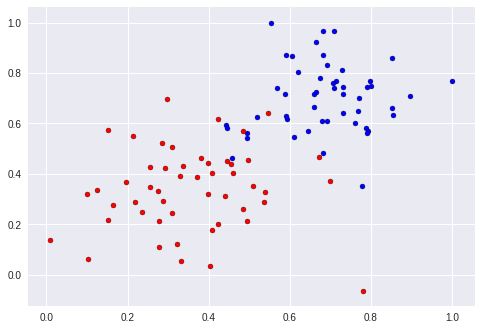

In [0]:
data = pd.read_csv('cursoDL/data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## Construindo o Perceptron


In [0]:
def perceptron(X, y,  eta, epochs):
  
  
  # initialize the weight matrix and store the learning rate
  N = X.shape[1] #number of inputs
  W = np.random.randn(N + 1) / np.sqrt(N)
    
  # insert a column of 1's as the last entry in the feature
  # matrix -- this little trick allows us to treat the bias
  # as a trainable parameter within the weight matrix
  X = np.c_[X, np.ones((X.shape[0]))]
        
  # loop over the desired number of epochs
  for epoch in np.arange(0, epochs):
    # loop over each individual data point
    for (x, target) in zip(X, y):
      # take the dot product between the input features
      # and the weight matrix, then pass this value
      # through the step function to obtain the prediction
      #p = self.step(np.dot(x, W))
      output = np.dot(x, W)
      p = 1 if output > 0 else 0
      # only perform a weight update if our prediction
      # does not match the target
      if p != target:
           # determine the error
           error = p - target
           # update the weight matrix
           W += -eta * error * x
  return W

In [0]:
weights = perceptron(X, y,  0.01, 100)

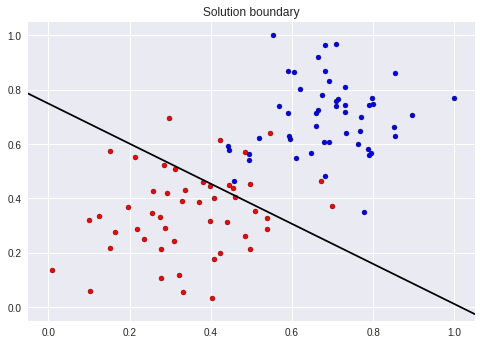

In [0]:
#display(-weights[0]/weights[1], -weights[2]/weights[1], 'black')

# Plotting the solution boundary
plt.title("Solution boundary")
display(-weights[0]/weights[1], -weights[2]/weights[1], 'black')

# Plotting the data
plot_points(X, y)
plt.show()